In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [6]:
df_raw=pd.read_csv('yelp.csv')

In [7]:
df_raw.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## First we take a look at the basic summary statistics
We see there are about 10,000 reviews. Average stars is 3.8

In [8]:
df_raw.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


## Then we check the uniqueness
There are 4174 business being rated by 6403 customers. Total number of unique reviews are 10,000. There is no duplicate in the data

In [9]:
print(df_raw['business_id'].nunique())
print(df_raw['review_id'].nunique())
print(df_raw['user_id'].nunique())

4174
10000
6403


Let's check the correlation between useful cool and funny. We see there are large outliers for each variable. We would remove those outliers and check the distribution again. However, from the pairplot, we see strong correlation between three variables

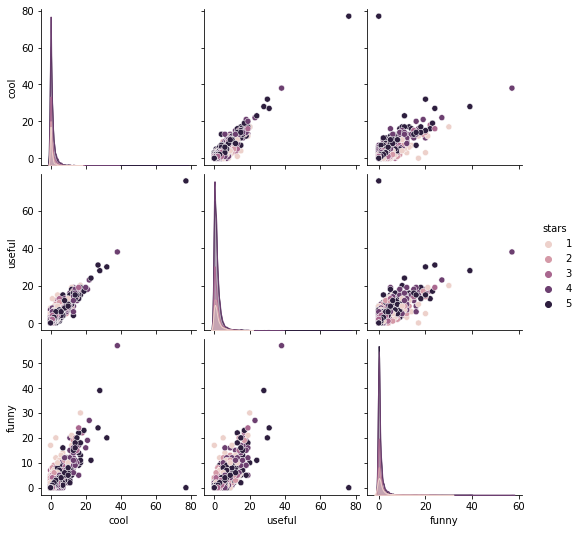

In [17]:
import seaborn as sns
sns.pairplot(df_raw[['cool', 'useful', 'funny','stars']],hue='stars')

In [26]:
sns.pairplot(df_raw[df_raw.cool<20][['cool', 'useful', 'funny','stars']],hue='stars',height=4,palette='')

TypeError: pairplot() got an unexpected keyword argument 'pallett'

In [24]:
print('useful:', df_raw[df_raw['useful']>40])
print('cool:',df_raw[df_raw['cool']>40])
print('funny:',df_raw[df_raw['funny']>40])

useful:                  business_id        date               review_id  stars  \
4957  gqLWBFxOKag8dXwVxEvTrg  2011-10-03  1kc50TqtMsIHDGR8yQgF8g      5   

                                                text    type  \
4957  Love this place! Amazing Happy Hour Specials!!  review   

                     user_id  cool  useful  funny  
4957  73eZuIuXVD5sif7GrIMfuQ    77      76      0  
cool:                  business_id        date               review_id  stars  \
4957  gqLWBFxOKag8dXwVxEvTrg  2011-10-03  1kc50TqtMsIHDGR8yQgF8g      5   

                                                text    type  \
4957  Love this place! Amazing Happy Hour Specials!!  review   

                     user_id  cool  useful  funny  
4957  73eZuIuXVD5sif7GrIMfuQ    77      76      0  
funny:                  business_id        date               review_id  stars  \
9634  1NZLxU5WvB5roPFzneAlLw  2008-09-19  nQHI2kQElYrMWrPBqdwE4w      4   

                                                   text    t